In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [69]:
warnings.filterwarnings("ignore")

In [35]:
pizzas = pd.read_csv("pizzas.csv")
pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [36]:
orders = pd.read_csv("orders.csv")
orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [37]:
order_details = pd.read_csv("order_details.csv")
order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [38]:
pizza_types = pd.read_csv("pizza_types.csv", encoding= 'unicode_escape')
pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [39]:
df = pd.merge(left = order_details, right = pizzas, on = "pizza_id", how = "left" )
df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95
48617,48618,21348,napolitana_s,1,napolitana,S,12.00
48618,48619,21349,mexicana_l,1,mexicana,L,20.25


In [40]:
df["order_details_id"].duplicated().sum()

0

In [41]:
df = pd.merge(left = df, right = pizza_types , on = "pizza_type_id", how = "left" )
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [42]:
df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 3.7+ MB


In [44]:
df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [72]:
orders["date"] = pd.to_datetime(orders["date"])
orders["time"] = pd.to_datetime(orders["time"])
orders["week_day"] = orders["date"].dt.strftime("%A")
orders["Year"] = orders["date"].dt.strftime("%Y")
orders["Month"] = orders["date"].dt.strftime("%B")

orders.head()
warnings.filterwarnings("ignore")


In [47]:
df["Sales"] = df["quantity"] * df["price"]
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


# 1. Total Sales

In [48]:
df["Sales"].sum()

817860.05

# Conclusion:
# The Total Sale is $817860 

In [49]:
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


# 2. Identify which pizza is ordered the most.

In [50]:
gb = df.groupby("name").agg({"quantity" : "sum"})
gb = gb.sort_values("quantity", ascending = False)
gb.head()

,quantity
name,
The Classic Deluxe Pizza,2453
The Barbecue Chicken Pizza,2432
The Hawaiian Pizza,2422
The Pepperoni Pizza,2418
The Thai Chicken Pizza,2371


In [51]:
gb.idxmax()

quantity    The Classic Deluxe Pizza
dtype: object

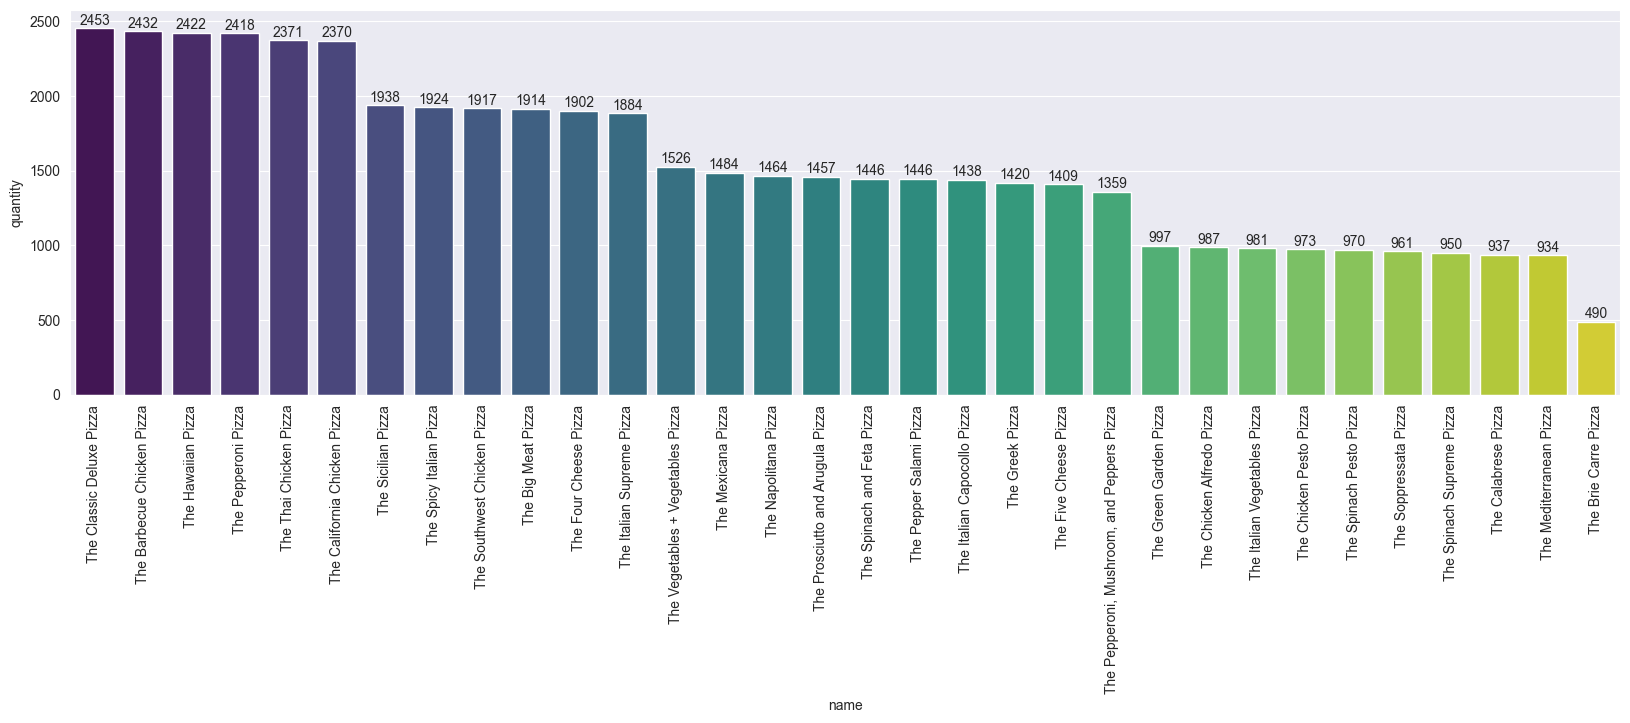

In [71]:
ax = sns.barplot(x = gb.index , y = gb["quantity"], data = gb, palette = "viridis")
ax = plt.xticks(rotation = 90)
sns.set({"figure.figsize": (20,5)})
for index, value in enumerate(gb['quantity']):
    plt.text(index, value + 5, str(value), ha='center', va = "bottom")

warnings.filterwarnings("ignore")


# Conclusion:
# The most orderd pizza is "The Classic Deluxe Pizza" with the order quantity 2453
# Apart from that the second most ordered pizza is "The Barbecue Chicken Pizza" with the order quantity 2432
# The 3rd most order pizza is "The Hawaiian Pizza" with the order quantity 2422

In [53]:
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


# 3. Identify which pizza is generating more sales

In [54]:
gb1 = df.groupby("name").agg({"Sales" : "sum"})
gb1 = gb1.sort_values("Sales", ascending = False)
gb1 = gb1.head(15)
gb1.head(3)

,Sales
name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50


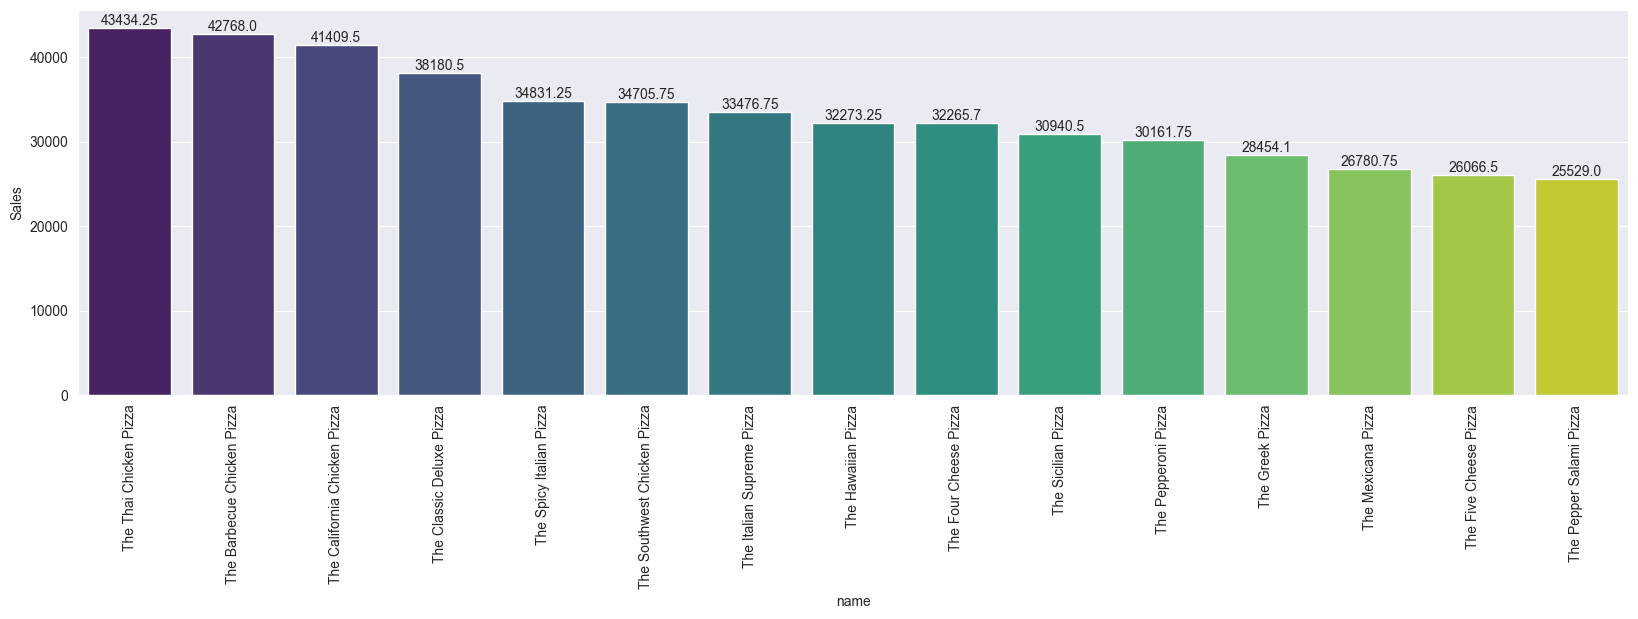

In [70]:
ax1 = sns.barplot(x = gb1.index, y = gb1["Sales"], data = gb1, palette = "viridis")
ax1 = plt.xticks(rotation = 90)
sns.set({"figure.figsize": (20,5)})
for index, value in enumerate(gb1['Sales']):
    plt.text(index, value + 5, str(value), ha='center', va = "bottom")

warnings.filterwarnings("ignore")


# Conclusion:
# The highest sales generating pizza is "The Thai Chicken Pizza" with the total sales $43434.25.

# The second highest sales generating pizza is "The Barbecue Chicken Pizza" with the total sales $42768.0 

# The third highest sales generating pizza is "The California Chicken Pizza" with the total sales $41409.5

In [56]:
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,Sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


# 4. Identify which pizza category is hotselling.

In [57]:
gb2 = df.groupby("category").agg({"Sales" : "sum"})
gb2 = gb2.sort_values("Sales", ascending = False)
gb2

,Sales
category,
Classic,220053.10
Supreme,208197.00
Chicken,195919.50
Veggie,193690.45


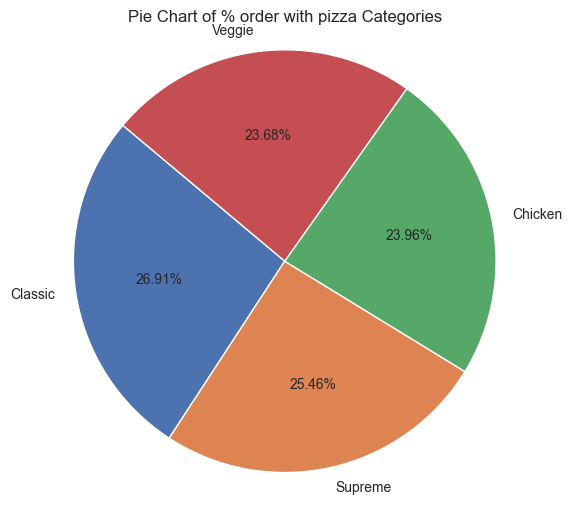

In [58]:
plt.figure(figsize=(6, 6))
plt.pie(gb2['Sales'], labels=gb2.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of % order with pizza Categories')
plt.show()

# Conclusion:
# The Most hotselling pizza category is "Classic" which is generating 26.91% Sales i.e. $220053.10 

# The 2nd hotselling pizza category is "Supreme" which is generating 25.46% Sales i.e. $208197.00

# The 3rd hotselling pizza category is "Chicken" which is generating 23.96% Sales i.e. $195919.50

In [59]:
orders.head()

,order_id,date,time,week_day,Year,Month
0,1,2015-01-01,2024-04-09 11:38:36,Thursday,2015,January
1,2,2015-01-01,2024-04-09 11:57:40,Thursday,2015,January
2,3,2015-01-01,2024-04-09 12:12:28,Thursday,2015,January
3,4,2015-01-01,2024-04-09 12:16:31,Thursday,2015,January
4,5,2015-01-01,2024-04-09 12:21:30,Thursday,2015,January


# 5. Identify which day of the week we are getting the most orders.

In [60]:
gb3 = orders.groupby("week_day").agg({"order_id" : "count"})
gb3 = gb3.sort_values("order_id", ascending = False)
gb3

,order_id
week_day,
Friday,3538
Thursday,3239
Saturday,3158
Wednesday,3024
Tuesday,2973
Monday,2794
Sunday,2624


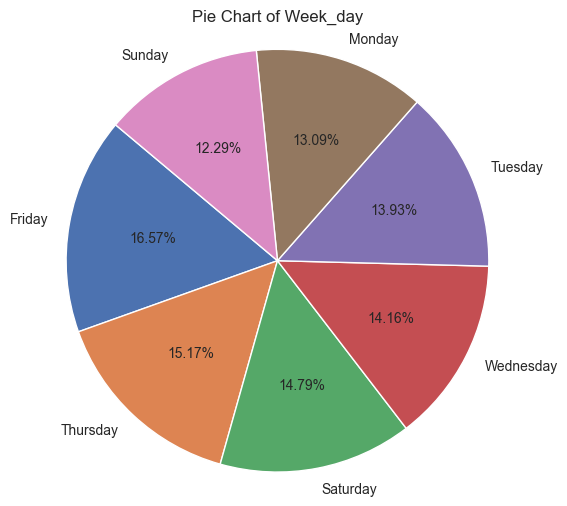

In [61]:
plt.figure(figsize=(6, 6))
plt.pie(gb3['order_id'], labels=gb3.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Week_day')
plt.show()

# Conclusion:
# We are getting highest 16.57% of orders on Friday i.e. 3538
# We are getting 2nd highest 15.17% of orders on Thursday with 3239
# We are getting 3rd highest 14.79% no. of orders on Saturday with 3158

In [62]:
orders["Hour"] = orders["time"].dt.strftime("%H")
orders.head()
orders["Hour"] = orders["Hour"].astype("int")

# 6. Identify the time at which we are getting high orders and the time at which we are getting the lowest orders

In [63]:
gb4 = orders.groupby("Hour").agg({"order_id":"count"})
gb4 = gb4.sort_values("order_id", ascending = False)
gb4

print("Max Orders", gb4.idxmax())
print("Min Orders", gb4.idxmin())

Max Orders order_id    12
dtype: int32
Min Orders order_id    9
dtype: int32


# Conclusion:
# We are getting maximum no. of orders at 12 PM and mininum no. of orders in the morning 9 AM

In [64]:
orders.head()
def get_day_time(hour):
    if hour >= 6 and hour < 12:
        return "Morning"
    elif hour >= 12 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 20:
        return "Evening"
    else:
        return "Night"

orders["day_time"] = orders["Hour"].apply(get_day_time)
        
orders.head()

,order_id,date,time,week_day,Year,Month,Hour,day_time
0,1,2015-01-01,2024-04-09 11:38:36,Thursday,2015,January,11,Morning
1,2,2015-01-01,2024-04-09 11:57:40,Thursday,2015,January,11,Morning
2,3,2015-01-01,2024-04-09 12:12:28,Thursday,2015,January,12,Afternoon
3,4,2015-01-01,2024-04-09 12:16:31,Thursday,2015,January,12,Afternoon
4,5,2015-01-01,2024-04-09 12:21:30,Thursday,2015,January,12,Afternoon


# 7. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)

In [65]:
gb5 = orders.groupby("day_time").agg({"order_id":"count"})
gb5 = gb5.sort_values("order_id", ascending = False)
gb5

,order_id
day_time,
Evening,8664
Afternoon,7915
Night,3531
Morning,1240


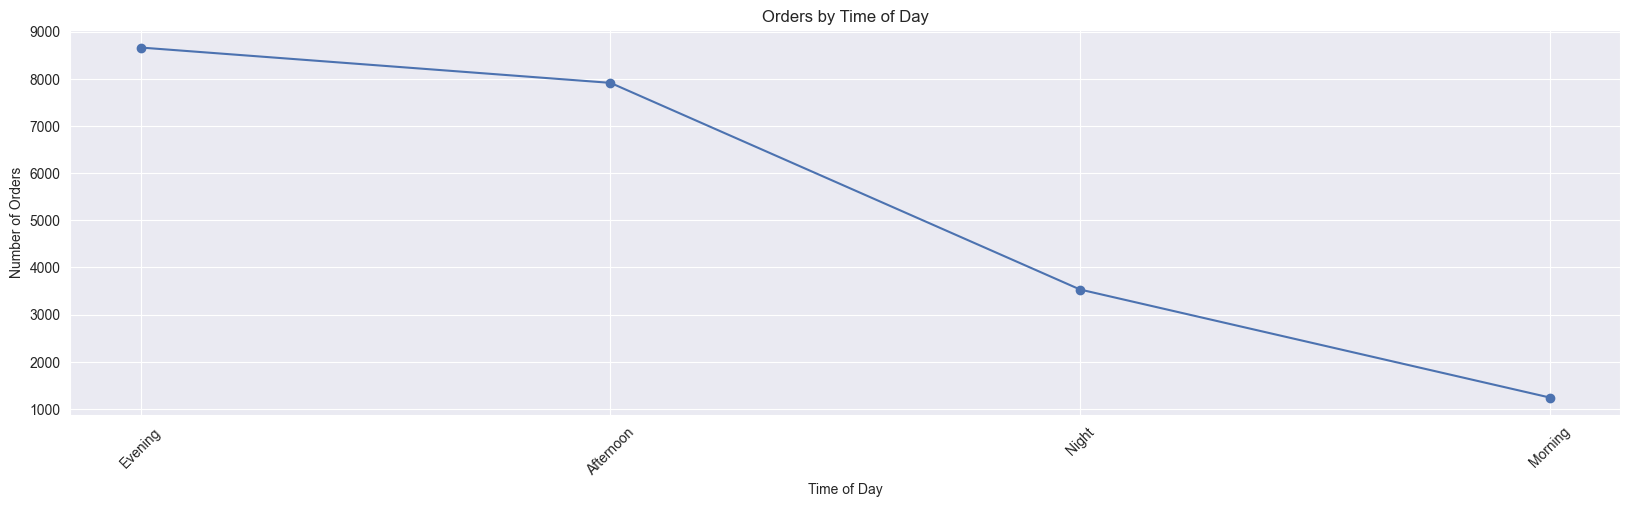

In [66]:
plt.plot(gb5.index, gb5["order_id"], marker='o', linestyle='-')
plt.title('Orders by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Conclusion:
# 1. We are getting maximum no. of orders in the evening i.e. 8664
# 2. We are getting minimum no. of orders in the morning i.e. 1240